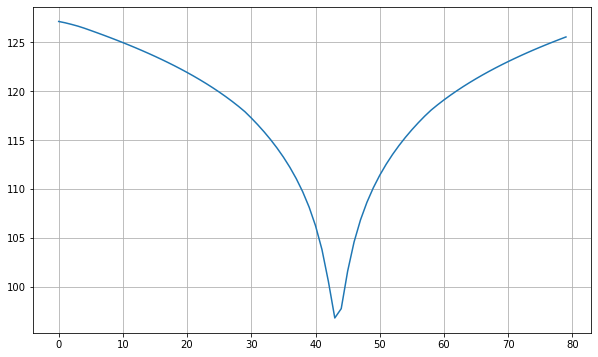

In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

# 정규화 함수 
def MinMaxScaler(data):
    denom = np.max(data,0)-np.min(data,0)
    nume = data-np.min(data,0)
    return nume/denom

# 정규화 되돌리기 함수 
def back_MinMax(data,value):
    diff = np.max(data,0)-np.min(data,0)
    back = value * diff + np.min(data,0)
    return back 

# 데이터 불러오기 
df = pd.read_csv("/home/smsung/Downloads/MilliCar-SUMO/Test/Test_data_220113/cv_s60_i30.0_k0.8606_a0.7656_l_Rainy.txt",sep='\t', names=['seq','speed','IR','k','a','Pathloss','dist','WA','BW','DR','AE'])

pathloss = df['Pathloss']
pathloss.plot(figsize=(10,6), grid=True) #plotting

X = df.drop(columns='AE') 
y = df.iloc[:,5:6] 

<IPython.core.display.Javascript object>


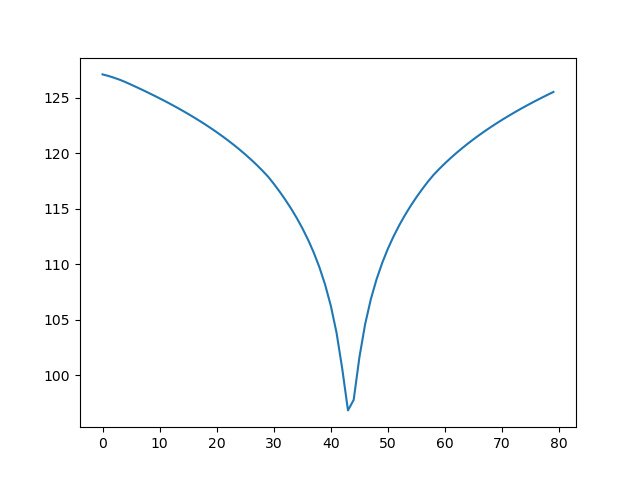

(80, 10)
(80,)


In [2]:
%matplotlib notebook
plt.plot(pathloss[:])
print(X.shape)
print(pathloss.shape)

In [3]:
seqLength = 70 # window size 
dataDim = 10 # 시가, 고가, 저가, 거래량 , 종가
hiddenDim = 10 
outputDim = 1
lr = 0.01
iterations = 500

trainSize = int(len(pathloss)*0.7)
trainSet = pathloss[0:trainSize]
testSet = pathloss[trainSize-seqLength:]

trainSet = MinMaxScaler(trainSet)
testSet = MinMaxScaler(testSet)


# 7일간의 5가지 데이터(시가, 종가, 고가, 저가, 거래량)를 받아와서 
# 바로 다음 날의 종가를 예측하는 모델로 구성

def buildDataSet(timeSeries, seqLength):
    xdata = []
    ydata = [] 
    for i in range(0, len(timeSeries)-seqLength):
        tx = timeSeries[i:i+seqLength]
        ty = timeSeries[i+seqLength]
        xdata.append(tx)
        ydata.append(ty)
    return np.array(xdata), np.array(ydata)
    
trainX, trainY = buildDataSet(trainSet, seqLength)
testX, testY = buildDataSet(testSet, seqLength)

In [15]:
# 모델 구성 

# First, let's define a RNN Cell, as a layer subclass.
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()

model.add(layers.SimpleRNN(units=10, 
                           activation='tanh',
                           input_shape=[1,1]))

model.add(layers.Dense(2))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_7 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 22        
Total params: 142
Trainable params: 142
Non-trainable params: 0
_________________________________________________________________


In [14]:
# 모델 학습과정 설정 
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# 모델 트레이닝 
hist = model.fit(trainX, trainY, epochs=1000, batch_size=16)

ValueError: Error when checking input: expected simple_rnn_6_input to have 3 dimensions, but got array with shape (0, 1)

In [46]:
from sklearn.model_selection import train_test_split

feature_cols = ['seq','speed','IR','k','a','dist','WA','BW','DR']
label_cols = ['Pathloss']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 20)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

NameError: name 'train' is not defined

In [8]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape


((100, 9), (100, 1))

In [9]:
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape

((80, 20, 9), (80, 1))

In [ ]:
from tf.keras.models import Sequential
from tf.keras.layers import Dense
from tf.keras.callbacks import EarlyStopping, ModelCheckpoint
from tf.keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )

model.add(Dense(1))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



ERROR! Session/line number was not unique in database. History logging moved to new session 48
Traceback (most recent call last):
  File "/home/smsung/anaconda3/envs/dl/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-7bc5d97358ab>", line 1, in <module>
    from tf.keras.models import Sequential
ModuleNotFoundError: No module named 'tf'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/smsung/anaconda3/envs/dl/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ModuleNotFoundError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/smsung/anaconda3/envs/dl/lib/python3.6/site-packages/IPython/core/ultra

In [ ]:
import os

model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                                    epochs=200, 
                                    batch_size=16,
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



ERROR! Session/line number was not unique in database. History logging moved to new session 45
Traceback (most recent call last):
  File "/home/smsung/anaconda3/envs/dl/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-b75f34463827>", line 3, in <module>
    model.compile(loss='mean_squared_error', optimizer='adam')
NameError: name 'model' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/smsung/anaconda3/envs/dl/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/smsung/anaconda3/envs/dl/lib/python3.6/site-packages/IPython/co

In [ ]:
model.load_weights(filename)
pred = model.predict(test_feature)

pred.shape
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()